In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import collections

from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

df = pd.read_csv('data/winequality-data.csv')

In [2]:
# Getting important information about the distributions of each column in the dataset:
df.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,id
count,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000
mean,6.854620,0.278027,0.333201,6.405819,0.045566,35.326187,138.395227,0.994026,3.187989,0.489704,10.518765,5.877489,2939.500000
std,0.841879,0.100459,0.121375,5.107972,0.021138,17.158043,42.996820,0.003025,0.150022,0.114186,1.237195,0.890364,1131.173506
min,3.800000,0.080000,0.000000,0.600000,0.009000,3.000000,9.000000,0.987110,2.740000,0.220000,8.000000,3.000000,981.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,107.250000,0.991700,3.090000,0.410000,9.500000,5.000000,1960.250000
50%,6.800000,0.260000,0.310000,5.200000,0.043000,34.000000,134.000000,0.993730,3.180000,0.470000,10.400000,6.000000,2939.500000
75%,7.300000,0.320000,0.380000,9.900000,0.050000,46.000000,168.000000,0.996160,3.280000,0.550000,11.400000,6.000000,3918.750000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.800000,1.080000,14.200000,9.000000,4898.000000


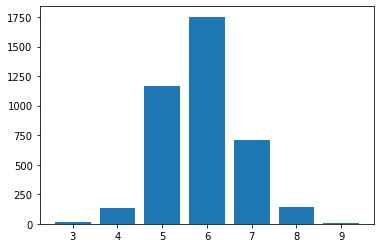

In [3]:
# Displaying distribution of the quality
quality_vals = df['quality']
height = collections.Counter(quality_vals)
plt.bar(quality_vals.unique(), list(height.values()))
plt.show()

In [4]:
# Dropping 'id' column from the dataset
df = df.drop('id', axis=1)
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,6.7,0.15,0.38,1.7,0.037,20.0,84.0,0.99046,3.09,0.53,11.4,6
1,6.7,0.44,0.31,1.9,0.030,41.0,104.0,0.99000,3.29,0.62,12.6,7
2,6.1,0.17,0.21,1.9,0.090,44.0,130.0,0.99255,3.07,0.41,9.7,5
3,6.6,0.39,0.22,4.0,0.038,17.0,98.0,0.99018,3.25,0.53,13.0,7
4,6.8,0.32,0.34,6.0,0.050,5.0,129.0,0.99530,3.19,0.40,9.1,5


In [5]:
# Getting pearson's correlation table
pearson_corr = df.corr()
pearson_corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
fixed.acidity,1,-0.018,0.3,0.093,0.018,-0.058,0.079,0.27,-0.43,-0.012,-0.13,-0.11
volatile.acidity,-0.018,1,-0.14,0.078,0.07,-0.096,0.088,0.034,-0.045,-0.033,0.072,-0.19
citric.acid,0.3,-0.14,1,0.11,0.11,0.088,0.11,0.16,-0.17,0.06,-0.078,-0.0081
residual.sugar,0.093,0.078,0.11,1,0.097,0.3,0.41,0.84,-0.2,-0.012,-0.45,-0.1
chlorides,0.018,0.07,0.11,0.097,1,0.1,0.2,0.26,-0.086,0.014,-0.36,-0.21
free.sulfur.dioxide,-0.058,-0.096,0.088,0.3,0.1,1,0.62,0.29,0.0046,0.064,-0.25,0.0029
total.sulfur.dioxide,0.079,0.088,0.11,0.41,0.2,0.62,1,0.53,0.0029,0.14,-0.45,-0.18
density,0.27,0.034,0.16,0.84,0.26,0.29,0.53,1,-0.1,0.08,-0.78,-0.31
pH,-0.43,-0.045,-0.17,-0.2,-0.086,0.0046,0.0029,-0.1,1,0.15,0.12,0.098
sulphates,-0.012,-0.033,0.06,-0.012,0.014,0.064,0.14,0.08,0.15,1,-0.01,0.054


In [6]:
# Getting Kendall's tau correlation table
kendall_corr = df.corr(method='kendall')
kendall_corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
fixed.acidity,1,-0.027,0.21,0.08,0.061,-0.022,0.073,0.19,-0.3,-0.0049,-0.078,-0.065
volatile.acidity,-0.027,1,-0.096,0.078,-0.0075,-0.057,0.076,0.0078,-0.038,-0.014,0.025,-0.15
citric.acid,0.21,-0.096,1,0.018,0.02,0.056,0.061,0.067,-0.1,0.055,-0.021,0.016
residual.sugar,0.08,0.078,0.018,1,0.16,0.24,0.3,0.59,-0.13,0.0072,-0.31,-0.067
chlorides,0.061,-0.0075,0.02,0.16,1,0.11,0.25,0.35,-0.039,0.059,-0.4,-0.25
free.sulfur.dioxide,-0.022,-0.057,0.056,0.24,0.11,1,0.45,0.22,-0.0038,0.039,-0.18,0.011
total.sulfur.dioxide,0.073,0.076,0.061,0.3,0.25,0.45,1,0.39,-0.0083,0.11,-0.33,-0.15
density,0.19,0.0078,0.067,0.59,0.35,0.22,0.39,1,-0.081,0.069,-0.64,-0.27
pH,-0.3,-0.038,-0.1,-0.13,-0.039,-0.0038,-0.0083,-0.081,1,0.091,0.1,0.085
sulphates,-0.0049,-0.014,0.055,0.0072,0.059,0.039,0.11,0.069,0.091,1,-0.026,0.026


From the tables above, as close the number is to -1 or 1, as highly are correlated variables with each other. For the "quality" variable, we can see that both in pearson's and kendall's tau correlations, **the most significant impact have Volatile acidity, Chlorides, total sulfur dioxide, density and alcohol.**

Let's also visualize with scatter plot relations between two observatory variables and color the samples with their quality. For the first visualization, we take alcohol and residual sugar. We can see that the quality is better if alcohol in it is more. On the other hand, residual sugar doesn't impact the quality. 

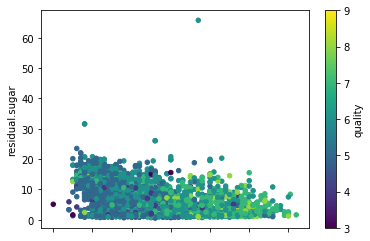

In [7]:
plot1 = df.plot.scatter(x='alcohol',
                        y='residual.sugar',
                        c = 'quality',
                        colormap='viridis')


For the next plot, I chose density and chlorides:

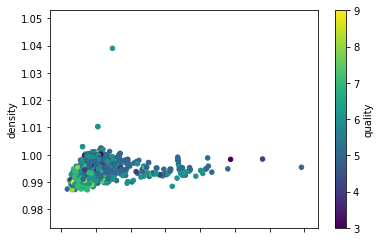

In [8]:
plot2 = df.plot.scatter(y='density',
                        x='chlorides',
                        c = 'quality',
                        colormap='viridis')


The last plot illustrates the connection of density and alcohol to the quality of the wine:

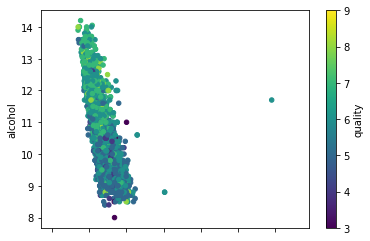

In [9]:
plot3 = df.plot.scatter(x='density',
                        y='alcohol',
                        c = 'quality',
                        colormap='viridis')

## ML model:

First, I use Linear Regression

In [10]:
# Reducing number of labels by two and deleting the quality column from the dataset.
y = df['quality']
y = y//2
x = df.drop('quality', axis=1)

In [11]:
# Now, we need to split our data into training and validation datasets. 
# We need to train our regression model with the 
x_train, x_valid, y_train, y_valid = train_test_split(x, y, random_state = 3)

In [12]:
lr_model = LinearRegression(normalize = False)
lr_model.fit(x_train, y_train)

model_coefficients = list(zip(x_train.columns, lr_model.coef_))
model_coefficients.sort(key = lambda tup: tup[1], reverse=True)

print(*model_coefficients, sep='\n')

('sulphates', 0.3562796248181471)
('pH', 0.319991739756339)
('chlorides', 0.20490862120954528)
('alcohol', 0.12688016956401044)
('residual.sugar', 0.040335619053000885)
('citric.acid', 0.033914938981329475)
('fixed.acidity', 0.03313783420644308)
('free.sulfur.dioxide', 0.0021966096296040516)
('total.sulfur.dioxide', -0.00028248151993159887)
('volatile.acidity', -1.1938613900506563)
('density', -69.93581402347972)


In [13]:
# predicting validation set and getting the accuracy of the model
lr_model_pred = lr_model.predict(x_valid)
lr_model_pred_class = np.array([round(el) for el in lr_model_pred])
lr_model_accuracy = np.sum(lr_model_pred_class == np.array(y_valid))/len(y_valid)

print(lr_model_accuracy)

0.7061224489795919


The accuracy of Linear Regression model is 70.6. Now its time from Logistic Regression with cross-validation technique:

In [14]:
lg_model = LogisticRegressionCV()

#Grid search for hyperparameter tuning:
gs_parameters = [{'penalty' : ['l1'],
                 'solver': [ 'liblinear', 'saga']},
                 {'penalty' : ['l2'],
                 'solver': [ 'newton-cg', 'sag', 'lbfgs']}]
grid_search = GridSearchCV(lg_model, gs_parameters)

In [15]:
best_clf = grid_search.fit(x_train, y_train)

/home/karlos/.local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/karlos/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/karlos/.local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/karlos/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureW

/home/karlos/.local/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/karlos/.local/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/karlos/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/karlos/.local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/karlos/.local/lib/python3.7/site-packages/sklearn/linear

/home/karlos/.local/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/karlos/.local/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/karlos/.local/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/karlos/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/karlos/.local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: 

/home/karlos/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/karlos/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/karlos/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/karlos/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/karlos/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of

/home/karlos/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/karlos/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/karlos/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/karlos/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/karlos/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of

/home/karlos/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/karlos/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/karlos/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/karlos/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/karlos/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of

/home/karlos/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/karlos/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/karlos/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/karlos/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/karlos/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of

In [16]:
# Getting best model
print(best_clf.best_score_)
print(best_clf.best_params_)

0.7154526889040164
{'penalty': 'l1', 'solver': 'liblinear'}


In [17]:
# Constructing and making predictions based on the best model
lg_model = LogisticRegressionCV(penalty='l1', solver='liblinear')
lg_model.fit(x_train, y_train)

lg_model.score(x_valid, y_valid)

/home/karlos/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/karlos/.local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.7122448979591837

## Using ML models to get the quality of my wine:

In [18]:
# My wine:
values = [[6.1056, 0.1158, 0.2778, 1.2, 0.0178, 45.33, 107.25, 0.994, 3.75, 0.699, 11.7]]
col_names = ['fixed.acidity',
 'volatile.acidity',
 'citric.acid',
 'residual.sugar',
 'chlorides',
 'free.sulfur.dioxide',
 'total.sulfur.dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']
my_wine = pd.DataFrame(np.array(values), columns=col_names)
my_wine

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
0,6.1056,0.1158,0.2778,1.2,0.0178,45.33,107.25,0.994,3.75,0.699,11.7


In [19]:
# Final Prediction with Logistic Regression:
lg_model.predict(my_wine)

array([3])

In [20]:
# Final Prediction with Linear Regression:
lr_model.predict(my_wine)

array([3.08997224])